In [14]:
# Import des paquets requis
import sys
sys.path.append('/opt/ros/noetic/lib/python3/dist-packages/')
sys.path.append('/usr/lib/python3/dist-packages')
from geometry_msgs.msg import Pose
import numpy as np 
import math
import rosbag
from matplotlib import pyplot as plt

### ROSBAG de la Simulation 

In [15]:
# Boucle pour lire l'ensemble du ROSBAG et extraire seulement les positions x/y
wheel_x_sim = np.array([])
wheel_y_sim = np.array([])
cam_x_sim = np.array([])
cam_y_sim = np.array([])

with rosbag.Bag("sim_bag.bag", 'r') as in_bag:
    for topic, msg, t in in_bag.read_messages():
        if topic=='/wheel_odom_pose':
            # Append permet d'ajouter une valeur à la liste
            # modifiez selon ce que vous souhaitez ajouter
            # voir http://docs.ros.org/en/noetic/api/geometry_msgs/html/msg/Pose.html
            # pour la definition du message de type Pose
            
            x = msg.position.x
            y = msg.position.y

            wheel_x_sim = np.append(wheel_x_sim, x)
            wheel_y_sim = np.append(wheel_y_sim, y)

        if topic=='/camera_pose':
            
            x = msg.position.x
            y = msg.position.y

            cam_x_sim = np.append(cam_x_sim, x)
            cam_y_sim = np.append(cam_y_sim, y)


# Comme le robot commence a (0,0), on doit appliquer un offset pour centrer le cercle
wheel_x_sim -= np.mean(wheel_x_sim)
wheel_y_sim -= np.mean(wheel_y_sim)

cam_x_sim -= np.mean(cam_x_sim)
cam_y_sim -= np.mean(cam_y_sim)

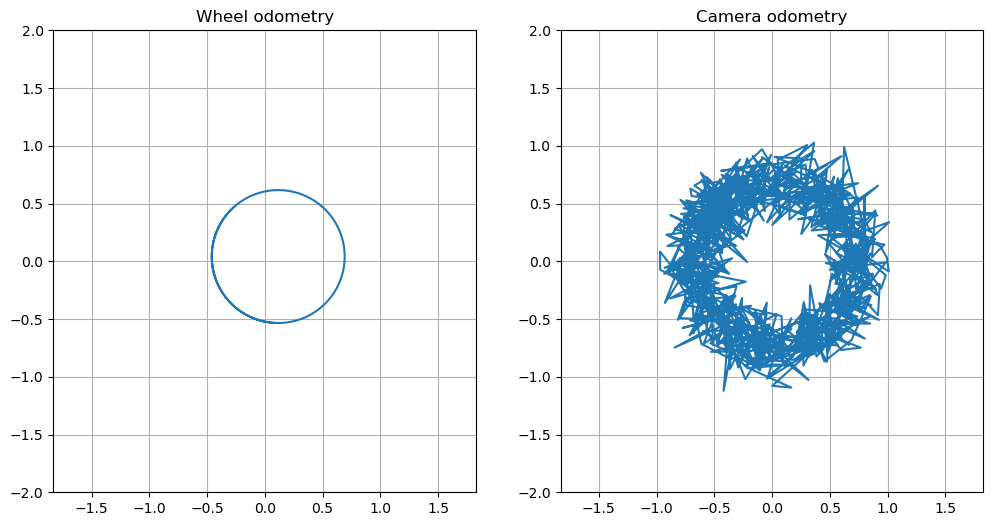

In [16]:
# Afficher les deux cercles (odometry des roues vs odometry de la camera)
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].set_title("Wheel odometry")
ax[0].plot(wheel_x_sim, wheel_y_sim)
ax[0].axis('equal')
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-2,2)
ax[0].grid()
ax[1].set_title("Camera odometry")
ax[1].plot(cam_x_sim, cam_y_sim)
ax[1].axis('equal')
ax[1].set_xlim(-2,2)
ax[1].set_ylim(-2,2)
ax[1].grid()
plt.show()

In [17]:
# Calculs des rayons avec numpy (np)
def rayon(x, y):
    return (np.hypot(x,y))

wheel_radius_sim = rayon(wheel_x_sim, wheel_y_sim)
cam_radius_sim = rayon(cam_x_sim, cam_y_sim)

# Faites ici les calculs requis (utilisez np) pour la moyenne et la variance.
def moyenne(radius_list):
    return np.mean(radius_list)

def deviation(radius_list):
    return np.var(radius_list)

# Wheel odom
print("La moyenne des rayon pour l'odometry des roues en simulation : ", moyenne(wheel_radius_sim))
print("Le déviation des rayon pour l'odometry des roues en simulation : ", deviation(wheel_radius_sim))

# Cam odom
print("La moyenne des rayon pour l'odometry de la camera en simulation : ", moyenne(cam_radius_sim))
print("Le déviation des rayon pour l'odometry de la camera en simulation : ", deviation(cam_radius_sim))


La moyenne des rayon pour l'odometry des roues en simulation :  0.555520710291849
Le déviation des rayon pour l'odometry des roues en simulation :  0.007544921716774742
La moyenne des rayon pour l'odometry de la camera en simulation :  0.7210920394026483
Le déviation des rayon pour l'odometry de la camera en simulation :  0.02331234579026851


### ROSBAG du robot

In [19]:
# Boucle pour lire l'ensemble du ROSBAG et extraire seulement les positions x/y
wheel_x_robot = np.array([])
wheel_y_robot = np.array([])
cam_x_robot = np.array([])
cam_y_robot = np.array([])

with rosbag.Bag("real_bag.bag", 'r') as in_bag:
    for topic, msg, t in in_bag.read_messages():
        if topic=='/wheel_odom_pose':
            # Append permet d'ajouter une valeur à la liste
            # modifiez selon ce que vous souhaitez ajouter
            # voir http://docs.ros.org/en/noetic/api/geometry_msgs/html/msg/Pose.html
            # pour la definition du message de type Pose

            x = msg.position.x
            y = msg.position.y

            wheel_x_robot = np.append(wheel_x_robot, x)
            wheel_y_robot = np.append(wheel_y_robot, y)

        if topic=='/camera_pose':

            x = msg.position.x
            y = msg.position.y

            cam_x_robot = np.append(cam_x_robot, x)
            cam_y_robot =np.append(cam_y_robot, y)


# Comme le robot commence a (0,0), on doit appliquer un offset pour centrer le cercle
wheel_x_robot -= np.mean(wheel_x_robot)
wheel_y_robot -= np.mean(wheel_y_robot)

cam_x_robot -= np.mean(cam_x_robot)
cam_y_robot -= np.mean(cam_y_robot) 
 

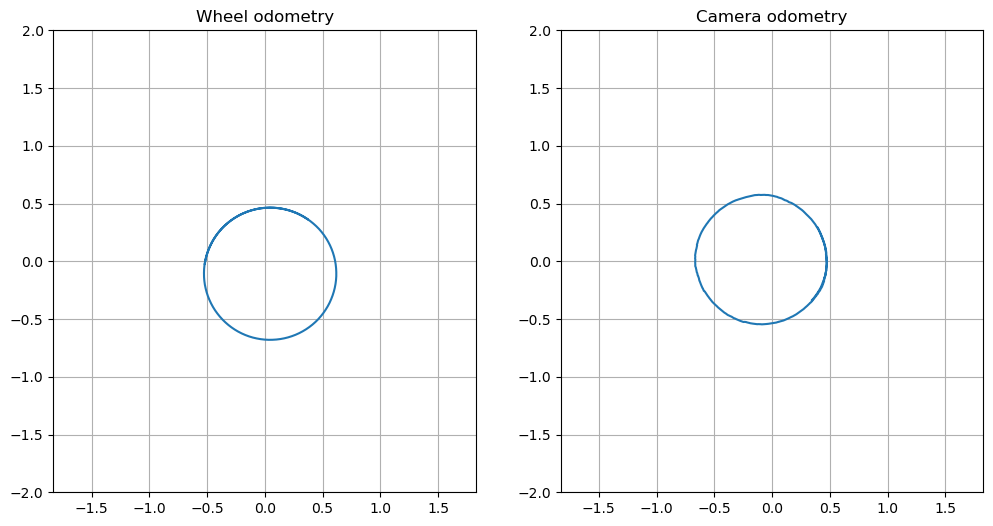

In [20]:
# Afficher les deux cercles (odometry des roues vs odometry de la camera)
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].set_title("Wheel odometry")
ax[0].plot(wheel_x_robot, wheel_y_robot)
ax[0].axis('equal')
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-2,2)
ax[0].grid()
ax[1].set_title("Camera odometry")
ax[1].plot(cam_x_robot, cam_y_robot)
ax[1].axis('equal')
ax[1].set_xlim(-2,2)
ax[1].set_ylim(-2,2)
ax[1].grid()
plt.show()

In [21]:
# Calculs des rayons avec numpy (np)
wheel_radius_robot = rayon(wheel_x_robot, wheel_y_robot)
cam_radius_robot = rayon(cam_x_robot, cam_y_robot)

# Wheel odom
print("La moyenne des rayon pour l'odometry des roues du robot : ", moyenne(wheel_radius_robot))
print("Le déviation des rayon pour l'odometry des roues du robot : ", deviation(wheel_radius_robot))

# Cam odom
print("La moyenne des rayon pour l'odometry de la camera du robot : ", moyenne(cam_radius_robot))
print("Le déviation des rayon pour l'odometry de la camera du robot : ", deviation(cam_radius_robot))


La moyenne des rayon pour l'odometry des roues du robot :  0.5541720344078273
Le déviation des rayon pour l'odometry des roues du robot :  0.0071005566665779075
La moyenne des rayon pour l'odometry de la camera du robot :  0.5505712161275369
Le déviation des rayon pour l'odometry de la camera du robot :  0.004887537501931311
